In [1]:
import tifffile
import numpy as np
import pandas as pd 
import math
import os

**NOTE**: the variable names for L24 and L25 tonsil are exactly the same. To generate mask for one tonsil section, just run the chunks for that section and modify the output path accordingly. 

## Create a dataframe for GeoMX ROI locations

## L24

In [2]:
GeoMX_MPP_X = 660/1652

GeoMX_MPP_Y = 740/1857

HALF_WIDTH_PX = 1652/2

HALF_HEIGHT_PX = 1857/2

## L25

In [15]:
GeoMX_MPP_X = 660/1659

GeoMX_MPP_Y = 740/1857

HALF_WIDTH_PX = 1659/2

HALF_HEIGHT_PX = 1857/2

## L25

In [16]:
data = {'ROI_num' : list(range(16)), 
        'tissue_num' : [i for i in [0] for j in range(16)],
        'ROI_X_cent' : [6748.8, 7408.9, 8069.0, 8729.1] * 4,
        'ROI_Y_cent' : [i for i in [4581.4, 5321.5, 6061.6, 6801.7] for j in range(4)]}

## L24

In [3]:
data = {'ROI_num' : list(range(16)), 
        'tissue_num' : [i for i in [0] for j in range(16)],
        'ROI_X_cent' : [7436.1, 8096.2, 8756.3, 9416.4] * 4,
        'ROI_Y_cent' : [i for i in [4579.6, 5319.7, 6059.8, 6799.9] for j in range(4)]}

In [4]:
GeoMX_ROI = pd.DataFrame(data)

GeoMX_ROI['ROI_X_cent_px'] = GeoMX_ROI['ROI_X_cent']/GeoMX_MPP_X

GeoMX_ROI['ROI_Y_cent_px'] = GeoMX_ROI['ROI_Y_cent']/GeoMX_MPP_Y

GeoMX_ROI['ROI_X_start_px'] = (GeoMX_ROI['ROI_X_cent_px'] - HALF_WIDTH_PX).apply(math.floor)

GeoMX_ROI['ROI_X_end_px'] = (GeoMX_ROI['ROI_X_cent_px'] + HALF_WIDTH_PX).apply(math.floor)

GeoMX_ROI['ROI_Y_start_px'] = (GeoMX_ROI['ROI_Y_cent_px'] - HALF_HEIGHT_PX).apply(math.floor) - 5

GeoMX_ROI['ROI_Y_end_px'] = (GeoMX_ROI['ROI_Y_cent_px'] + HALF_HEIGHT_PX).apply(math.floor) - 5

GeoMX_ROI['width'] = GeoMX_ROI['ROI_X_end_px'] - GeoMX_ROI['ROI_X_start_px']

GeoMX_ROI['height'] = GeoMX_ROI['ROI_Y_end_px'] - GeoMX_ROI['ROI_Y_start_px']

In [12]:
GeoMX_ROI.to_csv('../L24_ROI_position.csv', index=False)

In [41]:
len(data['ROI_num'])

16

In [17]:
GeoMX_ROI = pd.DataFrame(data)

GeoMX_ROI['ROI_X_cent_px'] = GeoMX_ROI['ROI_X_cent']/GeoMX_MPP_X

GeoMX_ROI['ROI_Y_cent_px'] = GeoMX_ROI['ROI_Y_cent']/GeoMX_MPP_Y

GeoMX_ROI['ROI_X_start_px'] = (GeoMX_ROI['ROI_X_cent_px'] - HALF_WIDTH_PX).apply(math.floor) - 5

GeoMX_ROI['ROI_X_end_px'] = (GeoMX_ROI['ROI_X_cent_px'] + HALF_WIDTH_PX).apply(math.floor) - 5

GeoMX_ROI['ROI_Y_start_px'] = (GeoMX_ROI['ROI_Y_cent_px'] - HALF_HEIGHT_PX).apply(math.floor) - 3

GeoMX_ROI['ROI_Y_end_px'] = (GeoMX_ROI['ROI_Y_cent_px'] + HALF_HEIGHT_PX).apply(math.floor) - 3

GeoMX_ROI['width'] = GeoMX_ROI['ROI_X_end_px'] - GeoMX_ROI['ROI_X_start_px']

GeoMX_ROI['height'] = GeoMX_ROI['ROI_Y_end_px'] - GeoMX_ROI['ROI_Y_start_px']



In [8]:
GeoMX_ROI.to_csv('../L25_ROI_position.csv', index=False)

In [5]:
GeoMX_ROI

,ROI_num,tissue_num,ROI_X_cent,ROI_Y_cent,ROI_X_cent_px,ROI_Y_cent_px,ROI_X_start_px,ROI_X_end_px,ROI_Y_start_px,ROI_Y_end_px,width,height
0,0,0,7436.1,4579.6,18612.783636,11492.320541,17786,19438,10558,12415,1652,1857
1,1,0,8096.2,4579.6,20265.033939,11492.320541,19439,21091,10558,12415,1652,1857
2,2,0,8756.3,4579.6,21917.284242,11492.320541,21091,22743,10558,12415,1652,1857
3,3,0,9416.4,4579.6,23569.534545,11492.320541,22743,24395,10558,12415,1652,1857
4,4,0,7436.1,5319.7,18612.783636,13349.571486,17786,19438,12416,14273,1652,1857
5,5,0,8096.2,5319.7,20265.033939,13349.571486,19439,21091,12416,14273,1652,1857
6,6,0,8756.3,5319.7,21917.284242,13349.571486,21091,22743,12416,14273,1652,1857
7,7,0,9416.4,5319.7,23569.534545,13349.571486,22743,24395,12416,14273,1652,1857
8,8,0,7436.1,6059.8,18612.783636,15206.822432,17786,19438,14273,16130,1652,1857
9,9,0,8096.2,6059.8,20265.033939,15206.822432,19439,21091,14273,16130,1652,1857


## Load cellLabel to annotation LUT

In [19]:
cellLabel_annotation_LUT = pd.read_csv('../L25_cellLabel_annotation_LUT.csv')

In [7]:
cellLabel_annotation_LUT

,cellLabel,Annotation
0,1,Other
1,2,Other
2,3,Other
3,4,Other
4,5,Other
...,...,...
831203,818027,Other
831204,818028,Other
831205,818029,Other
831206,818030,CD8 T


In [20]:
cellLabel_annotation_LUT = cellLabel_annotation_LUT.set_index('cellLabel')['Annotation'].to_dict()

In [21]:
cellLabel_annotation_LUT

{1: 'Other',
 2: 'Other',
 3: 'Other',
 4: 'Other',
 5: 'Other',
 6: 'Other',
 7: 'Other',
 8: 'Other',
 9: 'Other',
 10: 'Other',
 11: 'Other',
 12: 'Other',
 13: 'Other',
 14: 'Other',
 15: 'M1',
 16: 'Other',
 17: 'Other',
 18: 'BCL6+ B Cell',
 19: 'Other',
 20: 'Other',
 21: 'Other',
 22: 'Other',
 23: 'Other',
 24: 'Other',
 25: 'Other',
 26: 'Other',
 27: 'Other',
 28: 'Other',
 29: 'Other',
 30: 'Other',
 31: 'Other',
 32: 'Other',
 33: 'Other',
 34: 'Other',
 35: 'Other',
 36: 'Other',
 37: 'Other',
 38: 'Other',
 39: 'Other',
 40: 'Other',
 41: 'Other',
 42: 'Other',
 43: 'Other',
 44: 'Other',
 45: 'Other',
 46: 'Other',
 47: 'Other',
 48: 'Other',
 49: 'Other',
 50: 'Other',
 51: 'Other',
 52: 'Other',
 53: 'Other',
 54: 'Other',
 55: 'Other',
 56: 'Other',
 57: 'Other',
 58: 'Other',
 59: 'Other',
 60: 'Other',
 61: 'Other',
 62: 'Other',
 63: 'Other',
 64: 'Other',
 65: 'Other',
 66: 'Other',
 67: 'Other',
 68: 'Other',
 69: 'Other',
 70: 'Other',
 71: 'Other',
 72: 'Other

## Load aligned segmentation mask

In [6]:
seg_mask = tifffile.imread('../img_registration/L24_aligned_MESMER_mask.tiff')

In [22]:
seg_mask = tifffile.imread('../img_registration/L25_SIFT_aligned_MESMER_mask.tiff')

In [146]:
seg_mask.shape

(32768, 49152)

(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot: >,
 <matplotlib.image.AxesImage at 0x7fe030a6fc70>)

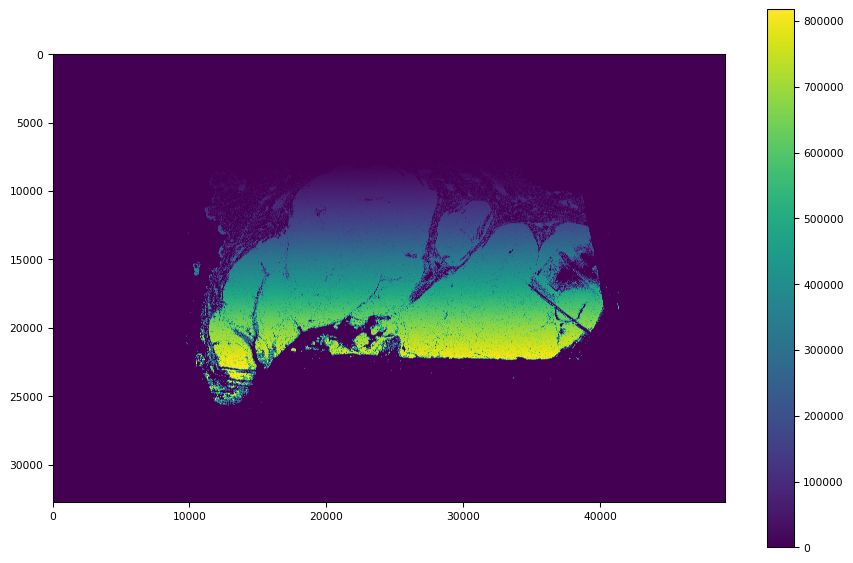

In [7]:
tifffile.imshow(seg_mask)

## Define the color and output name of each cell type you want in the GeoMX segment file name

In [194]:
celltype_color = {
   'DC': '377eb8', 
   'BCL6+ B Cell': 'f781bf',
   'CD4 T': '4daf4a',
   'CD8 T': '984ea3',
   'M2': 'd24e01',
   'Endothelial': 'a65628',
   'M1': '00ffff',
   'CD4 Treg': 'bebada',
   'Other': '808080',
   'Myeloid': 'e41a1c',
   'BCL6- B Cell': 'f6cec1'
}

celltype_outname = {
    'DC': 'DC', 
    'BCL6+ B Cell': 'BCL6pB',
    'CD4 T': 'CD4T',
    'CD8 T': 'CD8T',
    'M2': 'M2',
    'Endothelial': 'Endo',
    'M1': 'M1',
    'CD4 Treg': 'CD4Treg',
    'Other': 'Other',
    'Myeloid': 'Myeloid',
    'BCL6- B Cell': 'BCL6nB'
}

## Generate binary masks

Subset segmentation mask and plot them out to check if in the correct area.

In [9]:
mask_list = []
for i in GeoMX_ROI['ROI_num'].unique():
    print(f'Working on ROI {i}')
    row_idx = GeoMX_ROI['ROI_num'] == i
    x_start = GeoMX_ROI[row_idx]['ROI_X_start_px'].values[0]
    x_end = GeoMX_ROI[row_idx]['ROI_X_end_px'].values[0]
    y_start = GeoMX_ROI[row_idx]['ROI_Y_start_px'].values[0]
    y_end = GeoMX_ROI[row_idx]['ROI_Y_end_px'].values[0]

    print(f'ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #print(f'ROI pixel: {np.size(sub_seg)}')

    width = x_end - x_start
    
    height = y_end - y_start

    print(f'ROI size in pixel: {width} by {height}')

    #if width < 1614:
    #    print('Extend width by adjusting X start by 1px')
    #    x_start = x_start - 1
    #if height < 1614:
    #    print('Extend height by adjusting Y start by 1px')
    #    y_start = y_start - 1
    
    #print(f'New ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #width = x_end - x_start
    
    #height = y_end - y_start

    #print(f'ROI size in pixel: {width} by {height}')

    print(f'Subset segmentation mask')

    seg_sub = seg_mask[y_start:y_end, x_start:x_end]

    mask_list.append(seg_sub)

Working on ROI 0
ROI location: (17786, 19438, 10558, 12415)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Working on ROI 1
ROI location: (19439, 21091, 10558, 12415)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Working on ROI 2
ROI location: (21091, 22743, 10558, 12415)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Working on ROI 3
ROI location: (22743, 24395, 10558, 12415)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Working on ROI 4
ROI location: (17786, 19438, 12416, 14273)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Working on ROI 5
ROI location: (19439, 21091, 12416, 14273)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Working on ROI 6
ROI location: (21091, 22743, 12416, 14273)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Working on ROI 7
ROI location: (22743, 24395, 12416, 14273)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Working on ROI 8
ROI location: (17786, 19438, 14273, 16130)
ROI 

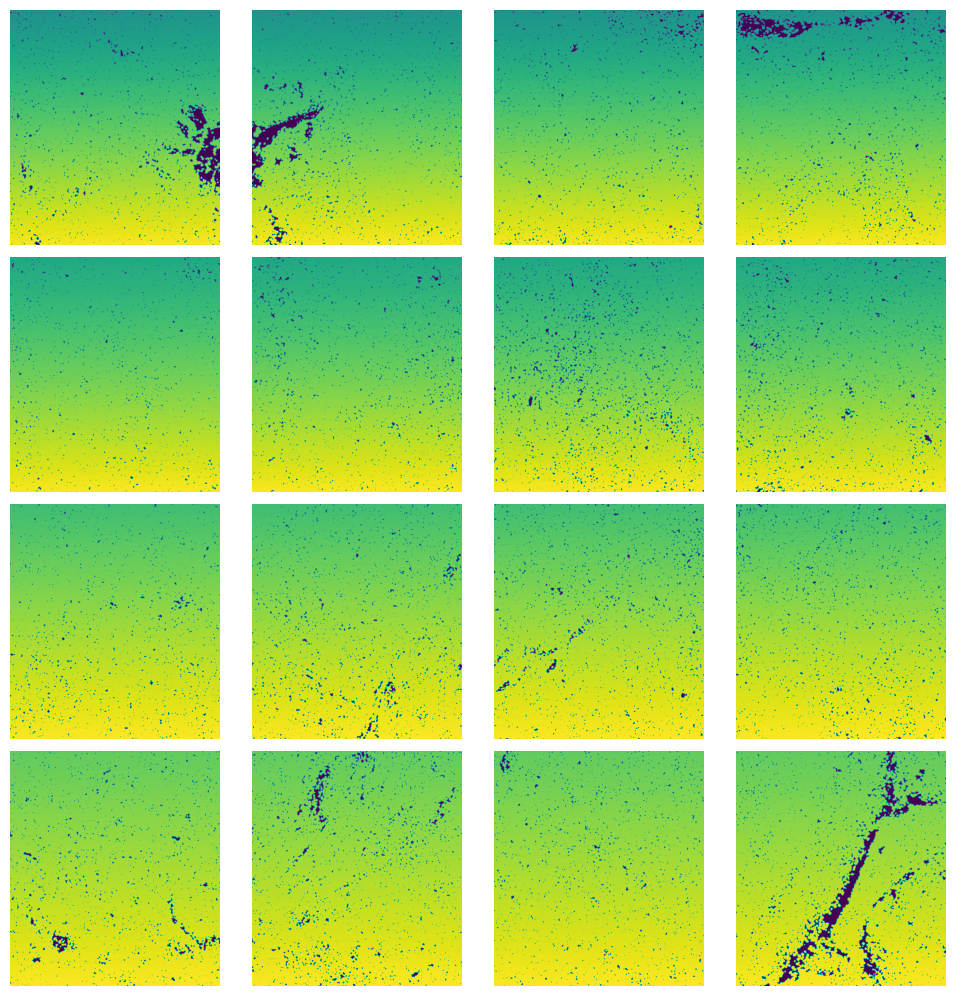

In [11]:
import matplotlib.pyplot as plt

def plot_images(images, num_rows, num_cols, titles=None, figsize=(10, 10)):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (img, ax) in enumerate(zip(images, axes)):
        ax.imshow(img)
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    
    plt.tight_layout()
    plt.show()

# Example usage
num_rows = 4
num_cols = 4

plot_images(mask_list, num_rows, num_cols)

Generate csvs that record the cell ID's in the ROI.

In [12]:
for i in GeoMX_ROI['ROI_num'].unique():
    print(f'Working on ROI {i}')
    row_idx = GeoMX_ROI['ROI_num'] == i
    x_start = GeoMX_ROI[row_idx]['ROI_X_start_px'].values[0]
    x_end = GeoMX_ROI[row_idx]['ROI_X_end_px'].values[0]
    y_start = GeoMX_ROI[row_idx]['ROI_Y_start_px'].values[0]
    y_end = GeoMX_ROI[row_idx]['ROI_Y_end_px'].values[0]

    print(f'ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #print(f'ROI pixel: {np.size(sub_seg)}')

    width = x_end - x_start
    
    height = y_end - y_start

    print(f'ROI size in pixel: {width} by {height}')

    #if width < 1614:
    #    print('Extend width by adjusting X start by 1px')
    #    x_start = x_start - 1
    #if height < 1614:
    #    print('Extend height by adjusting Y start by 1px')
    #    y_start = y_start - 1
    
    #print(f'New ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #width = x_end - x_start
    
    #height = y_end - y_start

    #print(f'ROI size in pixel: {width} by {height}')

    print(f'Subset segmentation mask')

    seg_sub = seg_mask[y_start:y_end, x_start:x_end]

    print(f'Segmentation size in px: {seg_sub.shape[1]} by {seg_sub.shape[0]}')

    # Iterate through all cell types in ROI

    ROI_cellLabel = pd.DataFrame(seg_sub.flatten(), columns = ['cellLabel'])

    # Filter out background whose cellLabel == 0

    ROI_cellLabel = ROI_cellLabel[ROI_cellLabel['cellLabel'] != 0]

    ROI_cellLabel = ROI_cellLabel.drop_duplicates()

    ROI_cellLabel.to_csv(os.path.join('../ROI_extracted_cellLabel/L24', f'ROI_{i}.csv'), index=False)

    # Get unique cell types in ROI

    #ROI_cellLabel_celltype = pd.merge(ROI_cellLabel, cellLabel_annotation_LUT, on = 'cellLabel', how = 'left')

    #ROI_cellLabel_celltype_unique = ROI_cellLabel_celltype.drop_duplicates()

    

Working on ROI 0
ROI location: (17786, 19438, 10558, 12415)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Segmentation size in px: 1652 by 1857
Working on ROI 1
ROI location: (19439, 21091, 10558, 12415)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Segmentation size in px: 1652 by 1857
Working on ROI 2
ROI location: (21091, 22743, 10558, 12415)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Segmentation size in px: 1652 by 1857
Working on ROI 3
ROI location: (22743, 24395, 10558, 12415)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Segmentation size in px: 1652 by 1857
Working on ROI 4
ROI location: (17786, 19438, 12416, 14273)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Segmentation size in px: 1652 by 1857
Working on ROI 5
ROI location: (19439, 21091, 12416, 14273)
ROI size in pixel: 1652 by 1857
Subset segmentation mask
Segmentation size in px: 1652 by 1857
Working on ROI 6
ROI location: (21091, 22743, 12416, 14273)
ROI size i

Generate binary mask per cell type for GeoMx extraction.

In [195]:

#for i in ROI_position['ROI_num'].unique():

#GeoMX_ROI['ROI_num'].unique()

for i in GeoMX_ROI['ROI_num'].unique():
    print(f'Working on ROI {i}')
    row_idx = GeoMX_ROI['ROI_num'] == i
    x_start = GeoMX_ROI[row_idx]['ROI_X_start_px'].values[0]
    x_end = GeoMX_ROI[row_idx]['ROI_X_end_px'].values[0]
    y_start = GeoMX_ROI[row_idx]['ROI_Y_start_px'].values[0]
    y_end = GeoMX_ROI[row_idx]['ROI_Y_end_px'].values[0]

    print(f'ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #print(f'ROI pixel: {np.size(sub_seg)}')

    width = x_end - x_start
    
    height = y_end - y_start

    print(f'ROI size in pixel: {width} by {height}')

    #if width < 1614:
    #    print('Extend width by adjusting X start by 1px')
    #    x_start = x_start - 1
    #if height < 1614:
    #    print('Extend height by adjusting Y start by 1px')
    #    y_start = y_start - 1
    
    #print(f'New ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #width = x_end - x_start
    
    #height = y_end - y_start

    #print(f'ROI size in pixel: {width} by {height}')

    print(f'Subset segmentation mask')

    seg_sub = seg_mask[y_start:y_end, x_start:x_end]

    print(f'Segmentation size in px: {seg_sub.shape[1]} by {seg_sub.shape[0]}')

    # Iterate through all cell types in ROI

    ROI_cellLabel = pd.DataFrame(seg_sub.flatten(), columns = ['cellLabel'])

    # Filter out background whose cellLabel == 0

    # ROI_cellLabel = ROI_cellLabel[ROI_cellLabel['cellLabel'] != 0]

    #ROI_cellLabel.to_csv(os.path.join('./ROI_extracted_cellLabel', f'ROI_{i}.csv'))

    # Get unique cell types in ROI

    ROI_cellLabel['Annotation'] = ROI_cellLabel['cellLabel'].map(cellLabel_annotation_LUT)

    ROI_cellLabel_celltype_unique = ROI_cellLabel.drop_duplicates()

    print(f'Cell count in ROI {i}:')

    celltype_count = ROI_cellLabel_celltype_unique.groupby('Annotation').size().sort_values()

    print(celltype_count)

    extraction_order = celltype_count[celltype_count > 20].index.values

    if 'Other' in extraction_order:
        print('Put Other celltype at the end of extraction order')
        idx_other = np.where(extraction_order == 'Other')[0]
        extraction_order = np.delete(extraction_order, idx_other)
        extraction_order = np.append(extraction_order, 'Other')



    print(f'Extraction order after excluding cells < 20: {extraction_order}')

    for celltype in extraction_order:

        print(f'Generating mask for {celltype}')
        
        binary_matrix = (ROI_cellLabel['Annotation'] == celltype).astype(int).values.reshape(seg_sub.shape).astype('uint8')*255
        
        output_dir = os.path.join(f'/mnt/nfs/home/huayingqiu/INDEPTH/run_031124/GeoMX_binary_masks/L25_shift/ROI_{i}')
        if os.path.exists(output_dir) == False:
            os.makedirs(output_dir)
        
        extraction_idx = np.where(extraction_order == celltype)[0][0] + 1

        print(f'Generating mask for {celltype}. Extraction order: {extraction_idx}')

        ROI_name = f"{i:03d}"

        output_name = f'{ROI_name}_{celltype_outname[celltype]}_{extraction_idx}_{celltype_color[celltype]}.tiff'

        tifffile.imwrite(os.path.join(output_dir, output_name), binary_matrix)

        

        









Working on ROI 0
ROI location: (16129, 17788, 10565, 12422)
ROI size in pixel: 1659 by 1857
Subset segmentation mask
Segmentation size in px: 1659 by 1857
Cell count in ROI 0:
Annotation
M2                25
Myeloid           79
M1               147
Endothelial      191
BCL6+ B Cell     229
CD4 Treg         231
CD8 T            262
DC               727
Other            886
CD4 T           1117
BCL6- B Cell    4736
dtype: int64
Put Other celltype at the end of extraction order
Extraction order after excluding cells < 20: ['M2' 'Myeloid' 'M1' 'Endothelial' 'BCL6+ B Cell' 'CD4 Treg' 'CD8 T' 'DC'
 'CD4 T' 'BCL6- B Cell' 'Other']
Generating mask for M2
Generating mask for M2. Extraction order: 1
Generating mask for Myeloid
Generating mask for Myeloid. Extraction order: 2
Generating mask for M1
Generating mask for M1. Extraction order: 3
Generating mask for Endothelial
Generating mask for Endothelial. Extraction order: 4
Generating mask for BCL6+ B Cell
Generating mask for BCL6+ B Cell. Extr